In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit import QuantumRegister, ClassicalRegister
import numpy as np
np.random.seed(1)

# 1. Build the following simple circuit to prepare the Bell state: 


In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw()


┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

# Results of this Circuit
The bell state is the qubit 
$$\frac{|00\rangle \otimes |11\rangle}{\sqrt{2}}$$
Which is not a totally decomsable tensor in $\mathbb{C} \bigotimes \mathbb{C}$, this gives it exotic behaviours. One can measure the results of this qubit using a simulator like Qiskit, which tells us that half of the time, after measurement, the qubit will be in the state $|00 \rangle$ or $|11 \rangle$.

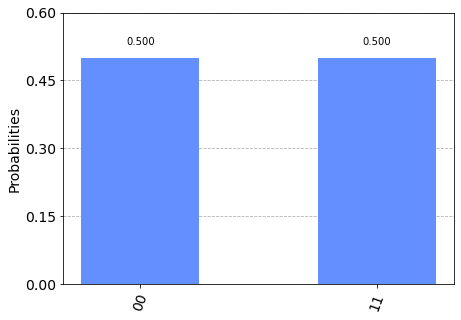

In [73]:
backend = Aer.get_backend('statevector_simulator')
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

# 2. Now add right before each qubit an Error gate. 
Now add, right before the CNOT gate and for each of the two qubits, an arbitrary “error gate”. By error gate we mean that with a certain probability (that you can decide but must be non-zero for all the choices) you have a 1 qubit unitary which can be either the identity, or the X gate (bit-flip error) or the Z gate (sign-flip error). 
The Following function ErrorCircuit, when called, creates a circuit which inserts uniformly at random, and right before the CNOT gate a $X$,$I$, or $Z$ gate.  


In [74]:
def ErrorCircuit():
    r = np.random.randint(3)
    qc = QuantumCircuit(2)
    qc.h(0)
    if r== 0:
        qc.cx(0,1)
        return qc
    if r==1:
        qc.x(0)
        qc.x(1)
        qc.cx(0,1)
        return qc
    if r==2:
        qc.z(0)
        qc.z(1)
        qc.cx(0,1)
        return qc
ErrorCircuit().draw()

┌───┐┌───┐     
q_0: ┤ H ├┤ X ├──■──
     ├───┤└───┘┌─┴─┐
q_1: ┤ X ├─────┤ X ├
     └───┘     └───┘

# Encode each of the two qubits with a sign-flip or a bit-flip code, in such a way that all the possible choices for the error gates described in 2), occurring on the logical qubits, can be detected and fixed. 
Motivate your choice. This is the most non-trivial part of the problem, so do it with a lot of care!


For this part I will implement  a Shor code in each of the qubits. The Shor is a well known Quantum Erorr correcting code which can fix Bit flip errors ($X$ gate) and Sign (Phase) flip errors ($Z$-gate). The Shor code uses Ancillary qubits which are part of a classical registry and help detect and fix these errors. The code in the following block implements an error correcting code on two qubits, in this case the error matrix is $X Z$ the product of the $X$ and $Z$.

After the next cell I will implement a function similar to ErrorCircuit() which creates a similar circuit as the one with $XZ$ error but will choose uniformly at random a matrix from $\{X,Y,I\}$

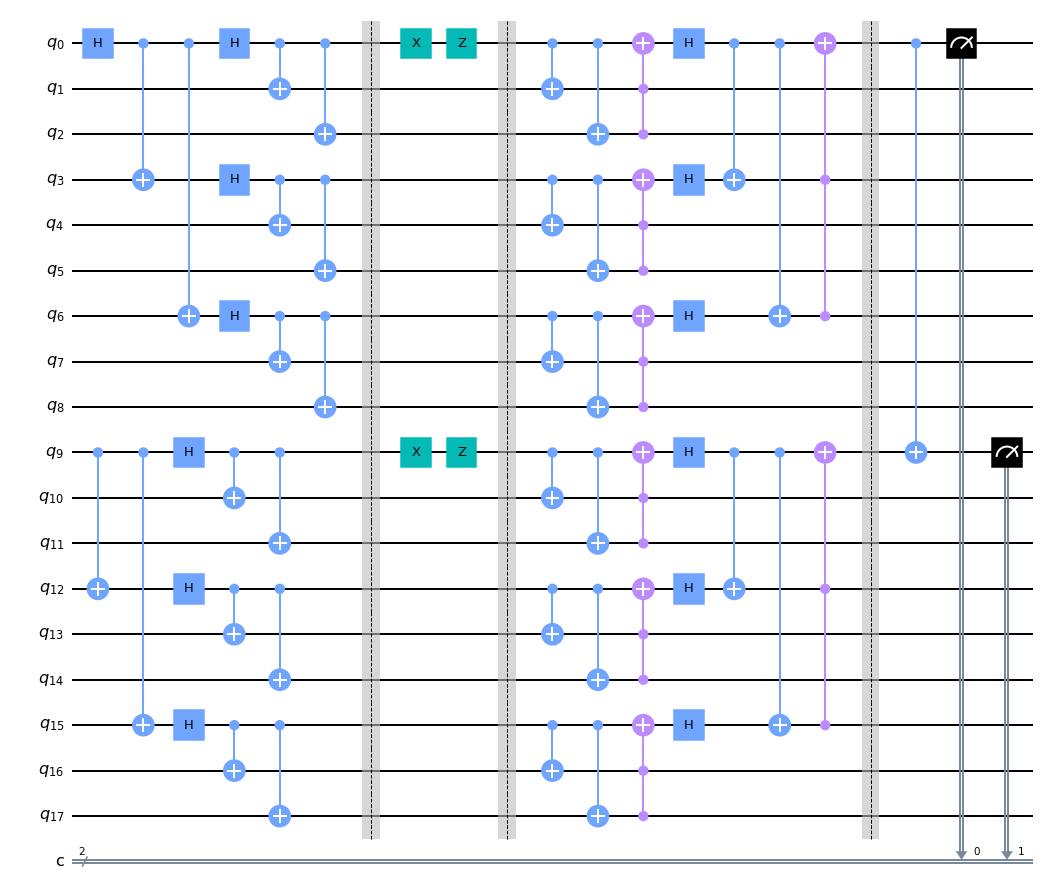

In [34]:

q = QuantumRegister(18,'q')
c = ClassicalRegister(2,'c')
circuit = QuantumCircuit(q,c)
circuit.h(0)
circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.cx(q[9],q[12])
circuit.cx(q[9],q[15])
#

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])



circuit.h(q[9])
circuit.h(q[12])
circuit.h(q[15])
# 

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])


circuit.cx(q[9],q[10])
circuit.cx(q[12],q[13])
circuit.cx(q[15],q[16])
#

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.cx(q[9],q[11])
circuit.cx(q[12],q[14])
circuit.cx(q[15],q[17])
#


circuit.barrier(q)

####ERROR############
circuit.x(q[0])#Bit flip error
circuit.z(q[0])#Phase flip error


circuit.x(q[9])#Bit flip error
circuit.z(q[9])#sign flip error
############################

circuit.barrier(q)
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[9],q[10])
circuit.cx(q[12],q[13])
circuit.cx(q[15],q[16])
#

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])


circuit.cx(q[9],q[11])
circuit.cx(q[12],q[14])
circuit.cx(q[15],q[17])
#


circuit.ccx(q[1],q[2],q[0])
circuit.ccx(q[4],q[5],q[3])
circuit.ccx(q[8],q[7],q[6])

circuit.ccx(q[10],q[11],q[9])
circuit.ccx(q[13],q[14],q[12])
circuit.ccx(q[17],q[16],q[15])
#




circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])


circuit.h(q[9])
circuit.h(q[12])
circuit.h(q[15])
#


circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])
circuit.ccx(q[6],q[3],q[0])

circuit.cx(q[9],q[12])
circuit.cx(q[9],q[15])
circuit.ccx(q[15],q[12],q[9])



circuit.barrier(q)

circuit.cx(0,9)

circuit.measure(q[0],c[0])
circuit.measure(q[9],c[1])





circuit.draw(output='mpl',filename='shorcode.png')

In [193]:
def ErrorCircuitBig():
    q = QuantumRegister(18,'q')
    c = ClassicalRegister(2,'c')
    circuit = QuantumCircuit(q,c)
    circuit.h(0)
    circuit.cx(q[0],q[3])
    circuit.cx(q[0],q[6])

    circuit.cx(q[9],q[12])
    circuit.cx(q[9],q[15])
    #

    circuit.h(q[0])
    circuit.h(q[3])
    circuit.h(q[6])



    circuit.h(q[9])
    circuit.h(q[12])
    circuit.h(q[15])
    # 

    circuit.cx(q[0],q[1])
    circuit.cx(q[3],q[4])
    circuit.cx(q[6],q[7])


    circuit.cx(q[9],q[10])
    circuit.cx(q[12],q[13])
    circuit.cx(q[15],q[16])
    #

    circuit.cx(q[0],q[2])
    circuit.cx(q[3],q[5])
    circuit.cx(q[6],q[8])

    circuit.cx(q[9],q[11])
    circuit.cx(q[12],q[14])
    circuit.cx(q[15],q[17])
    #


    circuit.barrier(q)

    ####ERROR############
    r = np.random.randint(3)

        
    if r==1:
        circuit.x(q[0])#Bit flip error
        circuit.x(q[9])#Bit flip error
       
    if r==2:
        circuit.z(q[0])#Phase flip error
        circuit.z(q[9])#phase flip error

        
    ############################

    circuit.barrier(q)
    circuit.cx(q[0],q[1])
    circuit.cx(q[3],q[4])
    circuit.cx(q[6],q[7])

    circuit.cx(q[9],q[10])
    circuit.cx(q[12],q[13])
    circuit.cx(q[15],q[16])
    #

    circuit.cx(q[0],q[2])
    circuit.cx(q[3],q[5])
    circuit.cx(q[6],q[8])


    circuit.cx(q[9],q[11])
    circuit.cx(q[12],q[14])
    circuit.cx(q[15],q[17])
    #


    circuit.ccx(q[1],q[2],q[0])
    circuit.ccx(q[4],q[5],q[3])
    circuit.ccx(q[8],q[7],q[6])

    circuit.ccx(q[10],q[11],q[9])
    circuit.ccx(q[13],q[14],q[12])
    circuit.ccx(q[17],q[16],q[15])
    #




    circuit.h(q[0])
    circuit.h(q[3])
    circuit.h(q[6])


    circuit.h(q[9])
    circuit.h(q[12])
    circuit.h(q[15])
    #


    circuit.cx(q[0],q[3])
    circuit.cx(q[0],q[6])
    circuit.ccx(q[6],q[3],q[0])

    circuit.cx(q[9],q[12])
    circuit.cx(q[9],q[15])
    circuit.ccx(q[15],q[12],q[9])



    circuit.barrier(q)

    circuit.cx(0,9)

    circuit.measure(q[0],c[0])
    circuit.measure(q[9],c[1])
    return circuit


# Here I define ErrorCircuitBig()
This function returns a QuantumCircuit with X,Z,I inserted in the specified place.By excecuting the next cell multiple times, one can see that the ERROR matrix is changing uniformly at random: choosing a certain gate.

In [194]:
ErrorCircuitBig().draw()

┌───┐          ┌───┐           ░ ┌───┐ ░           ┌───┐┌───┐          »
 q_0: ┤ H ├──■────■──┤ H ├──■────■───░─┤ X ├─░───■────■──┤ X ├┤ H ├──■────■──»
      └───┘  │    │  └───┘┌─┴─┐  │   ░ └───┘ ░ ┌─┴─┐  │  └─┬─┘└───┘  │    │  »
 q_1: ───────┼────┼───────┤ X ├──┼───░───────░─┤ X ├──┼────■─────────┼────┼──»
             │    │       └───┘┌─┴─┐ ░       ░ └───┘┌─┴─┐  │         │    │  »
 q_2: ───────┼────┼────────────┤ X ├─░───────░──────┤ X ├──■─────────┼────┼──»
           ┌─┴─┐  │  ┌───┐     └───┘ ░       ░      └───┘┌───┐┌───┐┌─┴─┐  │  »
 q_3: ─────┤ X ├──┼──┤ H ├──■────■───░───────░───■────■──┤ X ├┤ H ├┤ X ├──┼──»
           └───┘  │  └───┘┌─┴─┐  │   ░       ░ ┌─┴─┐  │  └─┬─┘└───┘└───┘  │  »
 q_4: ────────────┼───────┤ X ├──┼───░───────░─┤ X ├──┼────■──────────────┼──»
                  │       └───┘┌─┴─┐ ░       ░ └───┘┌─┴─┐  │              │  »
 q_5: ────────────┼────────────┤ X ├─░───────░──────┤ X ├──■──────────────┼──»
                ┌─┴─┐┌───┐     └───┘ ░       ░      └───┘┌───┐┌───┐     ┌─┴─┐»
 q_6: ──────────┤ X ├┤ H ├──■────■───░───────░───■────■──┤ X ├┤ H ├─────┤ X ├»
                └───┘└───┘┌─┴─┐  │   ░       ░ ┌─┴─┐  │  └─┬─┘└───┘     └───┘»
 q_7: ────────────────────┤ X ├──┼───░───────░─┤ X ├──┼────■─────────────────»
                          └───┘┌─┴─┐ ░       ░ └───┘┌─┴─┐  │                 »
 q_8: ─────────────────────────┤ X ├─░───────░──────┤ X ├──■─────────────────»
                ┌───┐          └───┘ ░ ┌───┐ ░      └───┘┌───┐┌───┐          »
 q_9: ──■────■──┤ H ├──■────■────────░─┤ X ├─░───■────■──┤ X ├┤ H ├──■────■──»
        │    │  └───┘┌─┴─┐  │        ░ └───┘ ░ ┌─┴─┐  │  └─┬─┘└───┘  │    │  »
q_10: ──┼────┼───────┤ X ├──┼────────░───────░─┤ X ├──┼────■─────────┼────┼──»
        │    │       └───┘┌─┴─┐      ░       ░ └───┘┌─┴─┐  │         │    │  »
q_11: ──┼────┼────────────┤ X ├──────░───────░──────┤ X ├──■─────────┼────┼──»
      ┌─┴─┐  │  ┌───┐     └───┘      ░       ░      └───┘┌───┐┌───┐┌─┴─┐  │  »
q_12: ┤ X ├──┼──┤ H ├──■────■────────░───────░───■────■──┤ X ├┤ H ├┤ X ├──┼──»
      └───┘  │  └───┘┌─┴─┐  │        ░       ░ ┌─┴─┐  │  └─┬─┘└───┘└───┘  │  »
q_13: ───────┼───────┤ X ├──┼────────░───────░─┤ X ├──┼────■──────────────┼──»
             │       └───┘┌─┴─┐      ░       ░ └───┘┌─┴─┐  │              │  »
q_14: ───────┼────────────┤ X ├──────░───────░──────┤ X ├──■──────────────┼──»
           ┌─┴─┐┌───┐     └───┘      ░       ░      └───┘┌───┐┌───┐     ┌─┴─┐»
q_15: ─────┤ X ├┤ H ├──■────■────────░───────░───■────■──┤ X ├┤ H ├─────┤ X ├»
           └───┘└───┘┌─┴─┐  │        ░       ░ ┌─┴─┐  │  └─┬─┘└───┘     └───┘»
q_16: ───────────────┤ X ├──┼────────░───────░─┤ X ├──┼────■─────────────────»
                     └───┘┌─┴─┐      ░       ░ └───┘┌─┴─┐  │                 »
q_17: ────────────────────┤ X ├──────░───────░──────┤ X ├──■─────────────────»
                          └───┘      ░       ░      └───┘                    »
 c: 2/═══════════════════════════════════════════════════════════════════════»
                                                                             »
«      ┌───┐ ░      ┌─┐   
« q_0: ┤ X ├─░───■──┤M├───
«      └─┬─┘ ░   │  └╥┘   
« q_1: ──┼───░───┼───╫────
«        │   ░   │   ║    
« q_2: ──┼───░───┼───╫────
«        │   ░   │   ║    
« q_3: ──■───░───┼───╫────
«        │   ░   │   ║    
« q_4: ──┼───░───┼───╫────
«        │   ░   │   ║    
« q_5: ──┼───░───┼───╫────
«        │   ░   │   ║    
« q_6: ──■───░───┼───╫────
«            ░   │   ║    
« q_7: ──────░───┼───╫────
«            ░   │   ║    
« q_8: ──────░───┼───╫────
«      ┌───┐ ░ ┌─┴─┐ ║ ┌─┐
« q_9: ┤ X ├─░─┤ X ├─╫─┤M├
«      └─┬─┘ ░ └───┘ ║ └╥┘
«q_10: ──┼───░───────╫──╫─
«        │   ░       ║  ║ 
«q_11: ──┼───░───────╫──╫─
«        │   ░       ║  ║ 
«q_12: ──■───░───────╫──╫─
«        │   ░       ║  ║ 
«q_13: ──┼───░───────╫──╫─
«        │   ░       ║  ║ 
«q_14: ──┼───░───────╫──╫─
«        │   ░       ║  ║ 
«q_15: ──■───░───────╫──╫─
«            ░       ║  ║ 
«q_16: ──────░───────╫──╫─
«      

#  Test your solution by making many measurements over the final state and testing that the results are in line with the expectations.

# 1. Testing with ErrorCircuitBig()
ErrorCircuitBig() picks a uniformly at random a matrix in $\{X,Z,I\}$. So in order to test that the final result is the desired result: $|00\rangle$ with probability 1/2 and $|11\rangle$ with probability 1/2 I will simulate the random circuit returned by ErrorCircuitBig() 1000 and take averages of the number of times each simulated circuit returns $|00\rangle$ or $|11\rangle$. The results show that the Shor code is immune to any type of error which can be seen in the probability vector obtained in the next cell. The results are in line with expectation: we should obtain the bell state, in other words with 1/2 probability the tensor $|00 \rangle$ or $|11\rangle$

In [212]:
for i in range(100):
    y=[0,0]
    counts = execute(ErrorCircuitBig(),Aer.get_backend('qasm_simulator'),shots = 1000).result().get_counts()
    y[0]+=counts['00']/1000
    y[1]+=counts['11']/1000
y

[0.515, 0.485]


# 2. Testing with XZ as  error
First I'll test the first circuit which has error $X * Z$. This is to show that that Shor code actually removes arbitrary errors during computation. The next cell uses the "Qasm_simulator" which uses a Noisy quantum circuit simulator backend.
As we can see, we get the expected states. With almost 1/2 probability the final state is $|00\rangle$ or $|11 \rangle$. The shots paramater in the execute method is Number of repetitions of each circuit, for sampling. Default: 1024. 

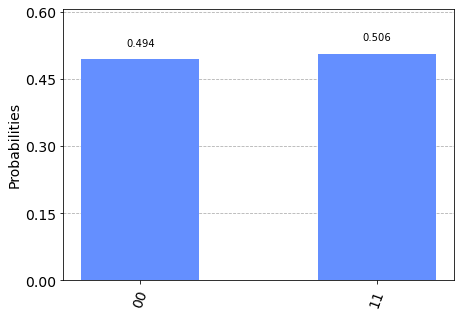

In [130]:
counts = execute(circuit,Aer.get_backend('qasm_simulator'),shots = 1000).result().get_counts()
plot_histogram(counts)